# Finding Heavy Traffic Indicators on I-94

Trong dự án này, chúng ta sẽ phân tích một bộ dữ liệu về lưu lượng giao thông đi phía tây trên đường cao tốc I-94 kết nối vùng Great Lakes và vùng đồng bằng Great Plains của Hoa Kỳ. Bộ dữ liệu này được cung cấp bởi John Hogue và có thể tải xuống từ kho lưu trữ này.

Mục tiêu của chúng ta trong phân tích này là xác định một số chỉ số về lưu lượng giao thông tăng cường trên I-94, như loại thời tiết, ngày trong tuần, giờ, v.v.

# The I-94 Traffic Dataset

John Hogue made the dataset available that we'll be working with, and you can download it from the UCI Machine Learning Repository

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
i_94 = pd.read_csv('d:/Data Cleaning DataQuest/Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [49]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,NaN,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,NaN,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,NaN,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,NaN,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,NaN,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [50]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              61 non-null     object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Bộ dữ liệu này có 48.204 hàng và 9 cột, và không có giá trị null. Mỗi hàng mô tả dữ liệu về giao thông và thời tiết cho một giờ cụ thể - chúng ta có dữ liệu từ ngày 02/10/2012, 09:00:00 đến ngày 30/09/2018, 23:00:00.

# Analyzing traffic volume

Text(0, 0.5, 'Frequency')

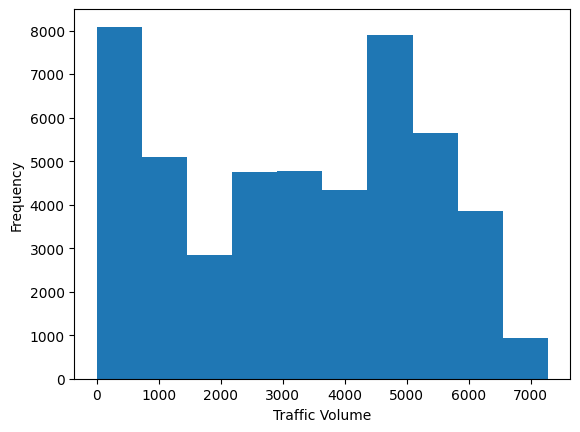

In [51]:
plt.hist(i_94['traffic_volume'])
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')

In [52]:
i_94['traffic_volume'].describe()


count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Trong khoảng thời gian từ ngày 02/10/2012 09:00:00 đến ngày 30/09/2018 23:00:00, lưu lượng giao thông hàng giờ dao động từ 0 đến 7.280 xe, với một số lượng trung bình là 3.260 xe.

Khoảng 25% thời gian, chỉ có 1.193 xe hoặc ít hơn đi qua trạm mỗi giờ - điều này có thể xảy ra vào ban đêm hoặc khi một tuyến đường đang được xây dựng. Tuy nhiên, khoảng 25% thời gian, lưu lượng giao thông gấp hơn bốn lần (4.933 xe hoặc nhiều hơn).

Quan sát này đưa phân tích của chúng ta theo hướng: so sánh dữ liệu ban ngày với dữ liệu ban đêm

# Traffic volume: Day vs. Night

Chia dữ liệu thành 2 phần:

- Ban ngày: từ 7h sáng tới 7h tối
- Ban đêm: từ 7h tối đến 7h sáng hôm sau

In [53]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])


In [54]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
night = i_94.copy()[(i_94['date_time'].dt.hour >= 19) | (i_94['date_time'].dt.hour < 7)]

Text(0.5, 0, 'Traffic Volume')

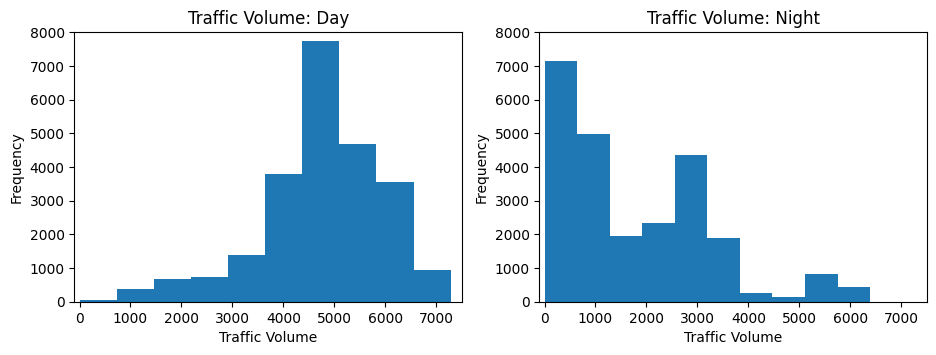

In [55]:
plt.figure(figsize=(11,3.5))
plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100,7500)
plt.ylim(0,8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

In [56]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [57]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

Biểu đồ histogram cho thấy phân bố lưu lượng giao thông trong ngày có xu hướng lệch trái. Điều này có nghĩa là hầu hết các giá trị lưu lượng giao thông đều cao - có 4.252 hoặc nhiều hơn xe đi qua trạm mỗi giờ trong 75% thời gian (vì 25% giá trị nhỏ hơn 4.252).

Biểu đồ histogram cho dữ liệu ban đêm có dạng lệch phải. Điều này có nghĩa là hầu hết các giá trị lưu lượng giao thông là thấp - trong 75% thời gian, số lượng xe đi qua trạm mỗi giờ vào ban đêm ít hơn 2.819

Mục tiêu của chúng tôi là tìm các chỉ số về lưu lượng truy cập lớn, vì vậy chúng tôi sẽ chỉ tập trung vào dữ liệu ban ngày.

# Time Indicators

Một trong những chỉ báo có thể dùng để dự đoán lưu lượng giao thông tăng cao là thời gian. Có thể có nhiều phương tiện xuất hiện trên đường vào một tháng cụ thể, trong một ngày cụ thể hoặc vào một khoảng thời gian cụ thể trong ngày. 

Dịch chuyển của lưu lượng giao thông trong thời gian có thể được ảnh hưởng bởi nhiều yếu tố như thời tiết, thời gian nghỉ lễ, ngày trong tuần, giờ cao điểm, và các sự kiện đặc biệt như giờ tan công việc. Hiểu được những mô hình và xu hướng này có thể giúp xác định các khung giờ cao điểm hoặc các thời điểm có lưu lượng giao thông nặng, từ đó đề xuất các biện pháp quản lý giao thông hoặc kế hoạch vận chuyển hiệu quả hơn

Ta sẽ xem xét một vài biểu đồ cho thấy lưu lượng giao thông thay đổi dựa trên:
- Tháng
- Ngày trong tuần
- Thời gian trong ngày

In [58]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132


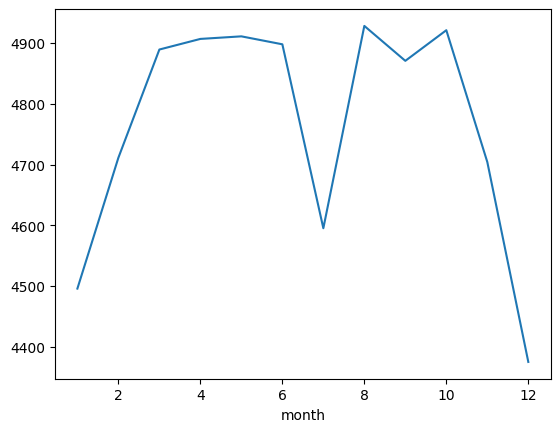

In [65]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month')['traffic_volume'].mean()
by_month.plot.line()
plt.show()

Giao thông có vẻ ít tắc nghẽn hơn trong những tháng lạnh (tháng 11-2) và tăng đáng kể trong những tháng ấm áp (tháng 3-10), trừ tháng đặc biệt là tháng 7. Có điều gì đặc biệt về tháng 7 không? Liệu giao thông có ít tắc nghẽn đáng kể trong tháng 7 hàng năm không?

<Axes: xlabel='month,year'>

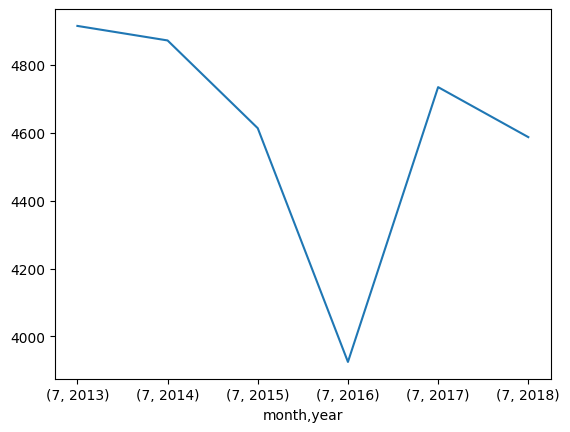

In [82]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby(['month','year'])['traffic_volume'].mean().plot.line()


Thông thường, giao thông vào tháng 7 khá tắc nghẽn, tương tự như các tháng ấm khác. Sự khác biệt duy nhất mà chúng tôi nhận thấy là vào năm 2016, giao thông giảm mạnh.

Dựa trên những thông tin trên, chúng ta có thể tạm kết luận rằng các tháng ấm thường có giao thông nặng hơn so với các tháng lạnh. Trong một tháng ấm, bạn có thể mong đợi mỗi giờ trong ngày có khoảng 5.000 xe cộ tham gia giao thông.

# Time Indicators (II)

<Axes: xlabel='dayofweek'>

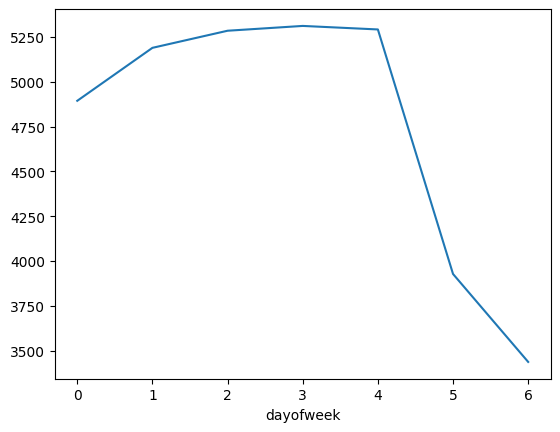

In [88]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek=day.groupby('dayofweek')['traffic_volume'].mean()
by_dayofweek.plot.line()

Lưu lượng giao thông cao hơn đáng kể vào các ngày làm việc (thứ Hai - thứ Sáu). Trừ ngày thứ Hai, chúng tôi chỉ thấy giá trị trên 5.000 xe trong các ngày làm việc. Giao thông ít hơn vào cuối tuần, với giá trị dưới 4.000 xe

In [90]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1
...,...,...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,2018,6
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,2018,6
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,2018,6
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,2018,6


Text(0.5, 1.0, 'Traffic Volume By Hour: Weekend')

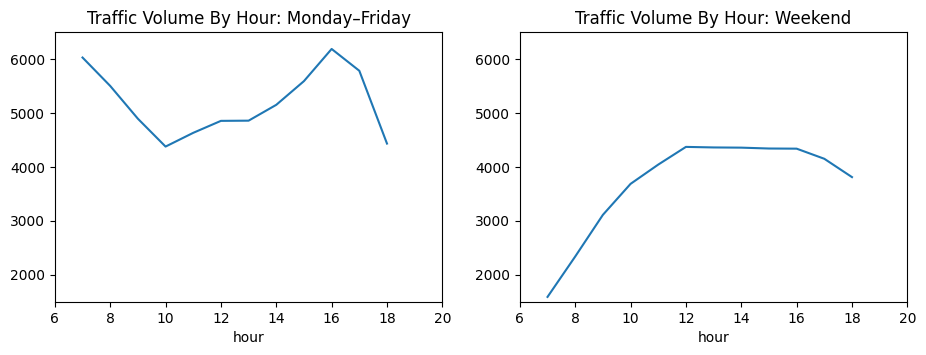

In [93]:
day['hour'] = day['date_time'].dt.hour
business_day = day.copy()[day['dayofweek']<=4] 
weekend = day.copy()[day['dayofweek']>=5]
by_hour_business = business_day.groupby('hour')['traffic_volume'].mean()
by_weekend = weekend.groupby('hour')['traffic_volume'].mean()
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business.plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Monday–Friday')

plt.subplot(1, 2, 2)
by_weekend.plot.line()
plt.xlim(6,20)
plt.ylim(1500,6500)
plt.title('Traffic Volume By Hour: Weekend')

Vào mỗi giờ trong ngày, lưu lượng giao thông thường cao hơn vào các ngày làm việc so với cuối tuần. Như dự đoán, giờ cao điểm diễn ra vào khoảng 7 giờ và 16 giờ - khi hầu hết mọi người di chuyển từ nhà đến nơi làm việc và ngược lại. Chúng tôi thấy mức lưu lượng trên 6.000 xe vào giờ cao điểm

Tóm lại, chúng tôi đã tìm thấy một số chỉ số liên quan đến thời gian cho biết mật độ giao thông cao:

- Giao thông thường nặng hơn trong những tháng ấm (tháng 3-10) so với những tháng lạnh (tháng 11-2).
- Giao thông thường nặng hơn vào các ngày làm việc so với cuối tuần.
- Trong các ngày làm việc, giờ cao điểm thường diễn ra vào khoảng 7 giờ và 16 giờ

# Weather Indicators

Một chỉ số khác có thể cho thấy giao thông là thời tiết. Bộ dữ liệu cung cấp cho chúng ta một số cột hữu ích về thời tiết: temp (nhiệt độ), rain_1h (lượng mưa trong 1 giờ), snow_1h (lượng tuyết trong 1 giờ), clouds_all (phần trăm mây), weather_main (tình trạng thời tiết chính), weather_description (mô tả tình trạng thời tiết)

In [97]:
day

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume,month,year,dayofweek,hour
0,NaN,288.28,0.00,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,10,2012,1,9
1,NaN,289.36,0.00,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,10,2012,1,10
2,NaN,289.58,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767,10,2012,1,11
3,NaN,290.13,0.00,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,10,2012,1,12
4,NaN,291.14,0.00,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,10,2012,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48194,NaN,283.84,0.00,0.0,75,Rain,proximity shower rain,2018-09-30 15:00:00,4302,9,2018,6,15
48195,NaN,283.84,0.00,0.0,75,Drizzle,light intensity drizzle,2018-09-30 15:00:00,4302,9,2018,6,15
48196,NaN,284.38,0.00,0.0,75,Rain,light rain,2018-09-30 16:00:00,4283,9,2018,6,16
48197,NaN,284.79,0.00,0.0,75,Clouds,broken clouds,2018-09-30 17:00:00,4132,9,2018,6,17


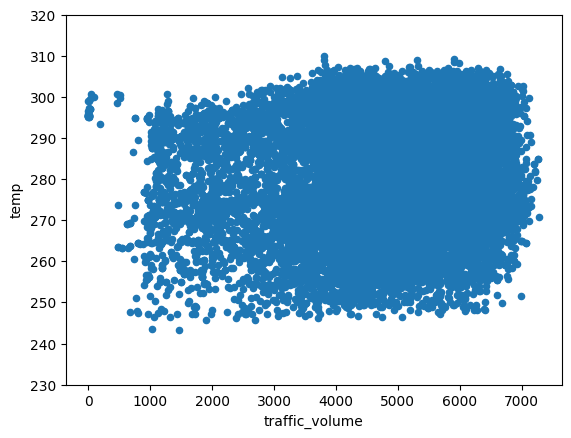

In [98]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

Chúng ta có thể kết luận rằng nhiệt độ không có vẻ là một chỉ số đáng tin cậy cho giao thông 

<Axes: ylabel='weather_main'>

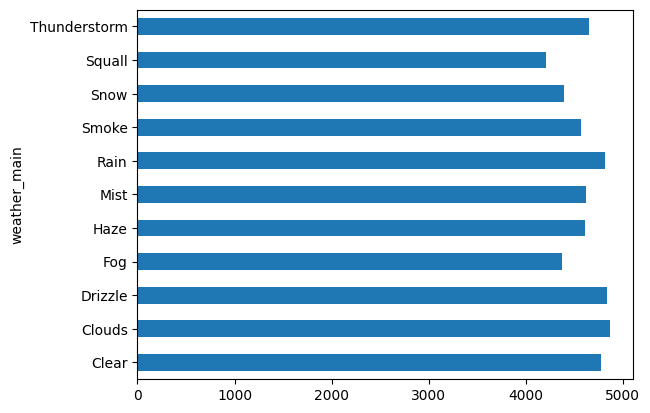

In [101]:
by_weather_main = day.groupby('weather_main')['traffic_volume'].mean()
by_weather_main.plot.barh()

Dường như không có loại thời tiết nào mà lưu lượng giao thông vượt quá 5.000 xe. Điều này làm cho việc tìm chỉ số giao thông cao trở nên khó khăn.

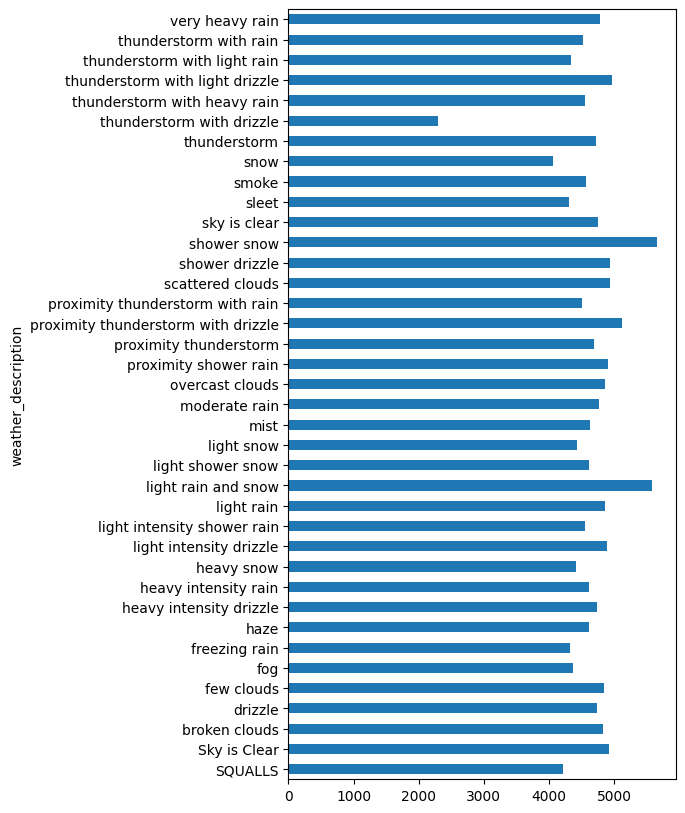

In [103]:
by_weather_description = day.groupby('weather_description')['traffic_volume'].mean()
by_weather_description.plot.barh(figsize=(5,10))
plt.show()

Có vẻ như có ba loại thời tiết mà lưu lượng giao thông vượt quá 5.000 xe:

- Tuyết rơi nhẹ (shower snow)
- Mưa nhẹ và tuyết (light rain and snow)
- Bão dông gần kèm mưa phùn (Proximity thunderstorm with drizzle)

Không rõ tại sao những loại thời tiết này có giá trị trung bình lưu lượng giao thông cao nhất - đây là thời tiết xấu, nhưng không quá tồi tệ. Có thể là vì khi thời tiết xấu, người ta có xu hướng sử dụng xe hơi hơn là xe đạp hoặc đi bộ

# Conclusion

Trong dự án này, chúng ta đã cố gắng tìm một số chỉ số cho giao thông cao trên đường cao tốc I-94. Chúng ta đã tìm thấy hai loại chỉ số:

Chỉ số thời gian:

- Giao thông thường nặng hơn trong những tháng ấm (tháng 3-10) so với những tháng lạnh (tháng 11-2).
- Giao thông thường nặng hơn vào các ngày làm việc so với cuối tuần.
- Trong các ngày làm việc, giờ cao điểm thường diễn ra vào khoảng 7 giờ và 16 giờ.

Chỉ số thời tiết:

- Tuyết rơi nhẹ
- Mưa nhẹ và tuyết
- Bão dông gần kèm mưa phùn